### Import Module

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # hide warn log information 

import tensorflow as tf                   # model
import numpy as np                        # argmax
import matplotlib.pyplot as plt           # plot images

### Load data and Preprocessing

In [2]:
# load mnist dataset
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# scale or normalize the datasets
training_images=training_images/255.0
test_images=test_images/255.0

# print the shape of the dataset
training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

### Plot some images

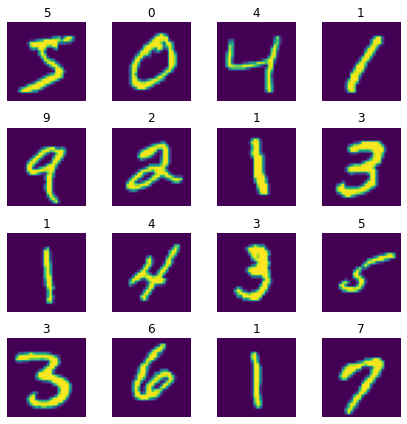

In [3]:
fig, axs = plt.subplots(4, 4, figsize=(6,6))

k = 0
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(training_images[k])
        axs[i, j].axis('off')
        axs[i, j].set_title(training_labels[k])
        k += 1

fig.tight_layout()
plt.show()

### Create model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28), name='input'),            # 28 * 28 => (784,1)
  tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden_1'),
  tf.keras.layers.Dense(64, activation=tf.nn.relu, name='hidden_2'),
  tf.keras.layers.Dense(32, activation=tf.nn.relu, name='hidden_3'),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='output')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 128)               100480    
                                                                 
 hidden_2 (Dense)            (None, 64)                8256      
                                                                 
 hidden_3 (Dense)            (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


### Compile model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Fit model

In [7]:
history = model.fit(training_images, training_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2504 - accuracy: 0.9267 - val_loss: 0.1175 - val_accuracy: 0.9643
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1047 - accuracy: 0.9685 - val_loss: 0.0922 - val_accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0756 - accuracy: 0.9768 - val_loss: 0.0799 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0568 - accuracy: 0.9820 - val_loss: 0.0992 - val_accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0938 - val_accuracy: 0.9717


### Plot History - Loss and Accuracy

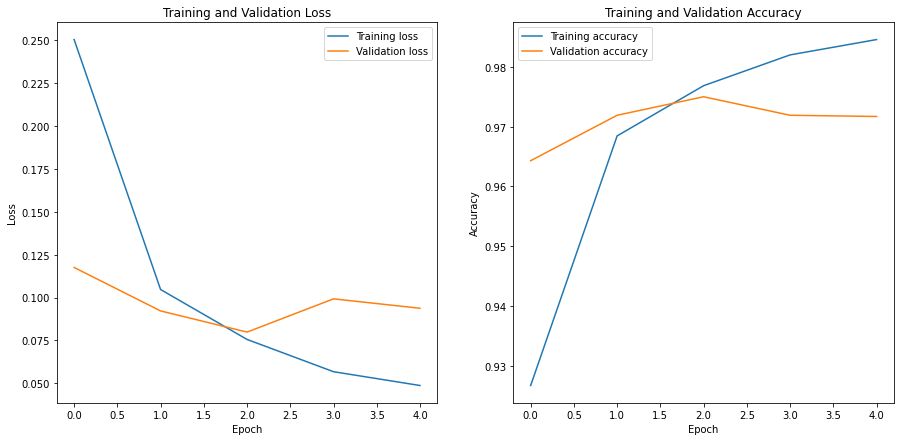

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the training and validation loss
ax1.plot(history.history['loss'], label='Training loss')
ax1.plot(history.history['val_loss'], label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

### Output 

In [9]:
results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0938 - accuracy: 0.9717


In [10]:
print("Loss       : {}".format(results[0]))
print("Accuracy   : {}".format(results[1]))

Loss       : 0.09376032650470734
Accuracy   : 0.9717000126838684


1/1 [==============================] - 0s 163ms/step


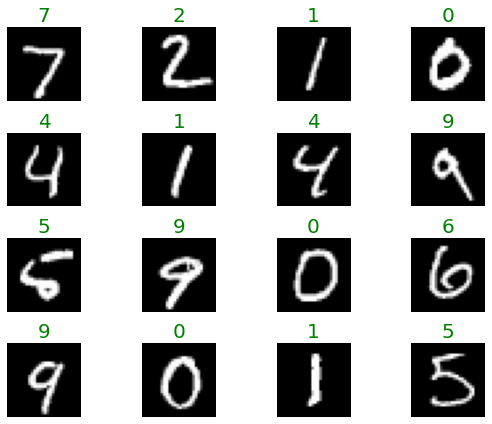

In [11]:
classifications = model.predict(test_images[:16])

fig, axs = plt.subplots(4, 4, figsize=(8,6))

k = 0
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(test_images[k], cmap='gray')
        axs[i, j].axis('off')
        if test_labels[k] == np.argmax(classifications[k]):
            axs[i, j].set_title(np.argmax(classifications[k]), fontsize=20, color='green')
        else:
            axs[i, j].set_title(np.argmax(classifications[k]), fontsize=20, color='red')
        k += 1

fig.tight_layout()
plt.show()

### Save model

In [12]:
model.save('mnist_hand_written.h5')

### Using dropout

In [13]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28,28), name='input'),            # 28 * 28 => (784,1)
#   tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden_1'),
#   tf.keras.layers.Dense(64, activation=tf.nn.relu, name='hidden_2'),
#   tf.keras.layers.Dropout(.2),
#   tf.keras.layers.Dense(32, activation=tf.nn.relu, name='hidden_3'),
#   tf.keras.layers.Dropout(.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='output')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [14]:
# history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels))

### Create API for Production 

#### Under testing

In [15]:
# # Fetch the Keras session and save the model
# # The signature definition is defined by the input and output tensors,
# # and stored with the default serving key
# import tempfile

# MODEL_DIR = tempfile.gettempdir()
# version = 1
# export_path = os.path.join(MODEL_DIR, str(version))
# print('export_path = {}\n'.format(export_path))

# tf.keras.models.save_model(
#     model,
#     export_path,
#     overwrite=True,
#     include_optimizer=True,
#     save_format=None,
#     signatures=None,
#     options=None
# )

# print('\nSaved model:')
# !ls -l {export_path}

In [16]:
# !saved_model_cli show --dir {export_path} --all